In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [ ]:
!unzip '/content/archive (6).zip'

Archive:  /content/archive (6).zip
  inflating: anthems.csv             


In [ ]:
df=pd.read_csv('/content/anthems.csv')
df

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ..."
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land..."


In [ ]:
lirycs = df['Anthem'].tolist()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
swords=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
swords

In [ ]:
def remove_stopwords(text):
    return " ".join([word.lower() for word in str(text).split() if word not in swords])


In [ ]:
lirycs=[remove_stopwords(text) for text in lirycs ]

In [ ]:
lirycs[0]

'around flag stand united, with one wish one goal, a sacred oath bestow upon proclaiming loyalty salvation. from war abstains he, who traitor born, he true man frightened, but dies warrior cause. with weapons hands a-brandished, we defend fatherland, our sacred rights weã¢â‚¬â„¢ll relinquish, the foe place land. for god proclaimed the nations earth shall wane, and yet live, thrive albania. for you, fight. o flag, flag, sacred symbol upon swear for albania, dear fatherland for honour glory. brave man named honoured the one sacrificed fatherland forever remembered on earth saint!'

In [ ]:
import string

def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [ ]:
lirycs=[remove_punctuations(text) for text in lirycs ]

In [ ]:
lirycs[0]

'around flag stand united with one wish one goal a sacred oath bestow upon proclaiming loyalty salvation from war abstains he who traitor born he true man frightened but dies warrior cause with weapons hands abrandished we defend fatherland our sacred rights weã¢â‚¬â„¢ll relinquish the foe place land for god proclaimed the nations earth shall wane and yet live thrive albania for you fight o flag flag sacred symbol upon swear for albania dear fatherland for honour glory brave man named honoured the one sacrificed fatherland forever remembered on earth saint'

In [ ]:
'weÃ¢â'.isalpha()

False

In [ ]:
def remove_nonalpha(text):
    return " ".join([word for word in str(text).split() if word.isalpha()])

In [ ]:
t='Around flag stand united With one wish one goal A sacred oath bestow upon Proclaiming loyalty salvation From war abstains he Who traitor born He true man frightened But dies warrior cause With weapons hands abrandished We defend fatherland Our sacred rights weÃ¢â‚¬â„¢ll relinquish The foe place land For God proclaimed The nations earth shall wane And yet live thrive Albania For you fight O Flag flag sacred symbol Upon swear For Albania dear fatherland For honour glory Brave man named honoured The one sacrificed fatherland Forever remembered On earth saint'
remove_nonalpha(t)

'Around flag stand united With one wish one goal A sacred oath bestow upon Proclaiming loyalty salvation From war abstains he Who traitor born He true man frightened But dies warrior cause With weapons hands abrandished We defend fatherland Our sacred rights relinquish The foe place land For God proclaimed The nations earth shall wane And yet live thrive Albania For you fight O Flag flag sacred symbol Upon swear For Albania dear fatherland For honour glory Brave man named honoured The one sacrificed fatherland Forever remembered On earth saint'

In [ ]:
lirycs=[remove_nonalpha(text) for text in lirycs ]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max([len(text.split()) for text in lirycs])

332

In [ ]:
#Tokenize the sentences
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(lirycs)

word_index = tokenizer.word_index

size_of_vocabulary=len(word_index) + 1 
print(f"Vocabulary Size = {size_of_vocabulary}")

Vocabulary Size = 3794


In [ ]:
word_index

{'us': 1,
 'and': 2,
 'land': 3,
 'the': 4,
 'we': 5,
 'may': 6,
 'god': 7,
 'let': 8,
 'to': 9,
 'people': 10,
 'thy': 11,
 'our': 12,
 'free': 13,
 'you': 14,
 'for': 15,
 'one': 16,
 'o': 17,
 'in': 18,
 'shall': 19,
 'glory': 20,
 'freedom': 21,
 'homeland': 22,
 'country': 23,
 'love': 24,
 'thee': 25,
 'nation': 26,
 'peace': 27,
 'flag': 28,
 'live': 29,
 'with': 30,
 'fatherland': 31,
 'oh': 32,
 'great': 33,
 'liberty': 34,
 'long': 35,
 'all': 36,
 'from': 37,
 'that': 38,
 'i': 39,
 'world': 40,
 'a': 41,
 'blood': 42,
 'ever': 43,
 'die': 44,
 'it': 45,
 'glorious': 46,
 'bless': 47,
 'of': 48,
 'thou': 49,
 'light': 50,
 'unity': 51,
 'on': 52,
 'sun': 53,
 'every': 54,
 'my': 55,
 'sons': 56,
 'sing': 57,
 'hail': 58,
 'your': 59,
 'stand': 60,
 'heart': 61,
 'always': 62,
 'forever': 63,
 'name': 64,
 'eternal': 65,
 'this': 66,
 'arise': 67,
 'new': 68,
 'be': 69,
 'united': 70,
 'strong': 71,
 'sea': 72,
 'dear': 73,
 'home': 74,
 'beloved': 75,
 'proud': 76,
 'childre

In [ ]:
embedding_dim = 300
max_length = 332
trunc_type='post'
padding_type='post'

In [ ]:
lirycs_sequences = tokenizer.texts_to_sequences(lirycs)
lirycs_padded = pad_sequences(lirycs_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
lirycs_sequences[0]

[320,
 28,
 60,
 70,
 30,
 16,
 545,
 16,
 406,
 41,
 130,
 407,
 1134,
 146,
 635,
 257,
 636,
 37,
 93,
 1757,
 231,
 177,
 1758,
 288,
 231,
 106,
 107,
 1759,
 94,
 637,
 199,
 162,
 30,
 462,
 189,
 1760,
 5,
 108,
 31,
 12,
 130,
 321,
 1761,
 4,
 463,
 158,
 3,
 15,
 7,
 1762,
 4,
 114,
 125,
 19,
 1763,
 2,
 258,
 29,
 1764,
 1135,
 15,
 14,
 95,
 17,
 28,
 28,
 130,
 200,
 146,
 159,
 15,
 1135,
 73,
 31,
 15,
 99,
 20,
 78,
 107,
 1765,
 638,
 4,
 16,
 1766,
 31,
 63,
 1767,
 52,
 125,
 1136]

In [ ]:
lirycs_padded[0]

array([ 320,   28,   60,   70,   30,   16,  545,   16,  406,   41,  130,
        407, 1134,  146,  635,  257,  636,   37,   93, 1757,  231,  177,
       1758,  288,  231,  106,  107, 1759,   94,  637,  199,  162,   30,
        462,  189, 1760,    5,  108,   31,   12,  130,  321, 1761,    4,
        463,  158,    3,   15,    7, 1762,    4,  114,  125,   19, 1763,
          2,  258,   29, 1764, 1135,   15,   14,   95,   17,   28,   28,
        130,  200,  146,  159,   15, 1135,   73,   31,   15,   99,   20,
         78,  107, 1765,  638,    4,   16, 1766,   31,   63, 1767,   52,
        125, 1136,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
import gensim.downloader as api

In [ ]:
api.info()

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1,
   'record_format': 'dict',
   'file_size': 6344358,
   'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py',
   'license': 'All files released for the task are free for general research use',
   'fields': {'2016-train': ['...'],
    '2016-dev': ['...'],
    '2017-test': ['...'],
    '2016-test': ['...']},
   'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.',
   'checksum': '701ea67acd82e75f95e1d8e62fb0ad29',
   'file_name': 'se

In [ ]:
word2vec_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
 word2vec_model["around"]

array([ 0.09472656, -0.11865234,  0.11816406,  0.25390625, -0.18652344,
       -0.07421875, -0.03637695, -0.18554688,  0.13769531,  0.24609375,
       -0.046875  , -0.06689453,  0.06640625,  0.00421143, -0.06298828,
       -0.10742188, -0.14648438,  0.2578125 , -0.05493164, -0.14355469,
        0.01116943,  0.10205078,  0.06640625, -0.07226562,  0.04370117,
        0.07958984, -0.33789062,  0.0703125 ,  0.0859375 , -0.15527344,
       -0.04174805, -0.0300293 , -0.03125   , -0.12988281, -0.11328125,
       -0.07080078, -0.13574219, -0.23828125, -0.07519531,  0.33007812,
        0.12451172, -0.12695312, -0.17578125, -0.09472656, -0.11621094,
        0.14550781,  0.05517578, -0.03198242,  0.15332031,  0.03271484,
        0.02050781,  0.0378418 , -0.12792969,  0.07128906, -0.15429688,
        0.10302734,  0.04296875, -0.05737305, -0.00224304, -0.20605469,
        0.01928711,  0.03149414, -0.11230469, -0.27148438,  0.07324219,
       -0.01269531, -0.03417969,  0.13476562,  0.00570679,  0.05

In [ ]:
embedding_matrix = np.zeros((size_of_vocabulary, 300))

for word, i in word_index.items():
  try:
    embedding_vector = word2vec_model[word]
  except:
    embedding_vector = None
  if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(3794, 300)

In [ ]:
embeded_lirycs=[]
for liryc in lirycs_padded:
    embeded_liryc=[]
    for i in liryc:
        embeded_liryc.append(embedding_matrix[i])
    embeded_lirycs.append(embeded_liryc)

embeded_lirycs=np.array(embeded_lirycs)
embeded_lirycs.shape

(190, 332, 300)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=1, verbose=0)


In [ ]:
anthem_vec=[]
for liryc in embeded_lirycs:
    anthem_vec.append(tsne.fit_transform(liryc))

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default lea

In [ ]:
np.array(anthem_vec).shape

(190, 332, 1)

In [ ]:
anthem_vec=np.squeeze(anthem_vec)

In [ ]:
anthem_vec.shape

(190, 332)

In [ ]:
tsne = TSNE(n_components=2, verbose=0)
anthem_vec_2d=tsne.fit_transform(anthem_vec)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
anthem_vec_2d.shape

(190, 2)

In [ ]:
tsne = TSNE(n_components=3, verbose=0)
anthem_vec_3d=tsne.fit_transform(anthem_vec)
anthem_vec_3d.shape

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(190, 3)

In [ ]:
cluster_df=pd.DataFrame(df['Country'],columns=['Country'])


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
wcss=[]
for i in range(5,26):
  km=KMeans(i)
  km.fit(anthem_vec_2d)
  wcss.append(km.inertia_)

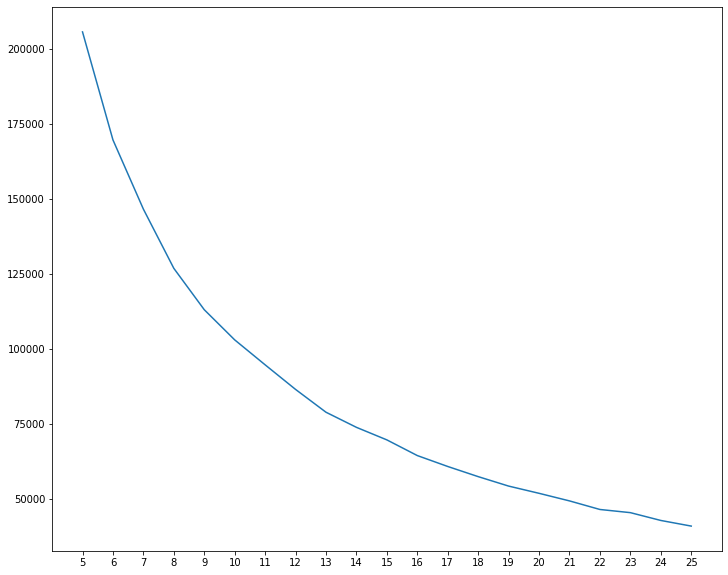

In [ ]:
fig = plt.figure(figsize =(12, 10)) 
num_cluster=range(5,26)
plt.plot(num_cluster,wcss)
plt.xticks(num_cluster);

In [ ]:
km=KMeans(10)
km.fit(anthem_vec_2d)

KMeans(n_clusters=10)

In [ ]:
cluster=km.predict(anthem_vec_2d)
cluster_df["2d_cluster10"]=cluster

In [ ]:
cluster_df

,Country,2d_cluster10
0,Albania,1
1,Armenia,9
2,Austria,3
3,Azerbaijan,2
4,Belarus,9
...,...,...
185,Tunisia,1
186,Uganda,9
187,Western Sahara,7
188,Zambia,3


In [ ]:
cluster_df["2d_cluster10"].value_counts()

0    30
8    29
2    20
1    19
4    19
5    17
7    16
3    14
6    14
9    12
Name: 2d_cluster10, dtype: int64

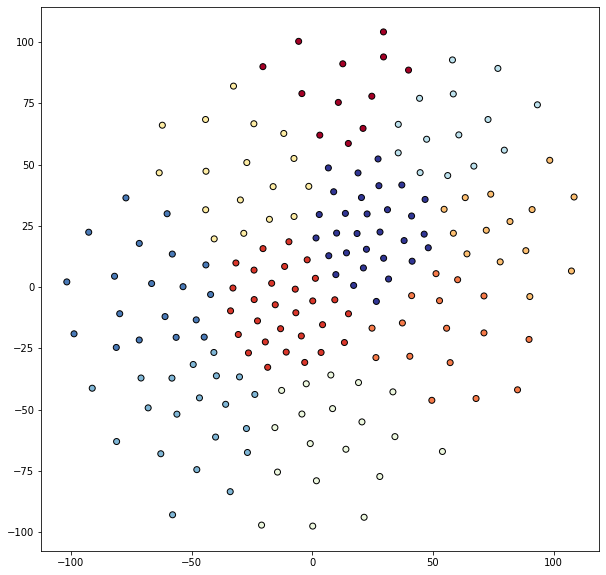

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(anthem_vec_2d[:,0],anthem_vec_2d[:,1],c=cluster_df["2d_cluster10"],cmap='RdYlBu_r',edgecolors='black')

In [ ]:
km=KMeans(16)
km.fit(anthem_vec_2d)

KMeans(n_clusters=16)

In [ ]:
cluster=km.predict(anthem_vec_2d)
cluster_df["2d_cluster16"]=cluster

In [ ]:
cluster_df["2d_cluster16"].value_counts()

12    18
7     18
0     18
9     16
13    13
8     12
3     12
10    11
1     11
6     10
5     10
2     10
15     9
11     8
4      7
14     7
Name: 2d_cluster16, dtype: int64

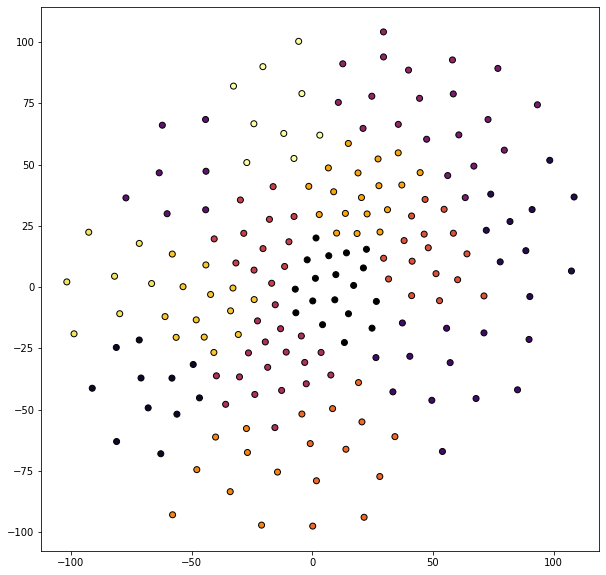

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(anthem_vec_2d[:,0],anthem_vec_2d[:,1],c=cluster_df["2d_cluster16"],cmap='inferno',edgecolors='black')

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean'

In [ ]:
from wordcloud import WordCloud
wc= WordCloud(width=2000,height=2000,min_font_size=10,background_color='black')

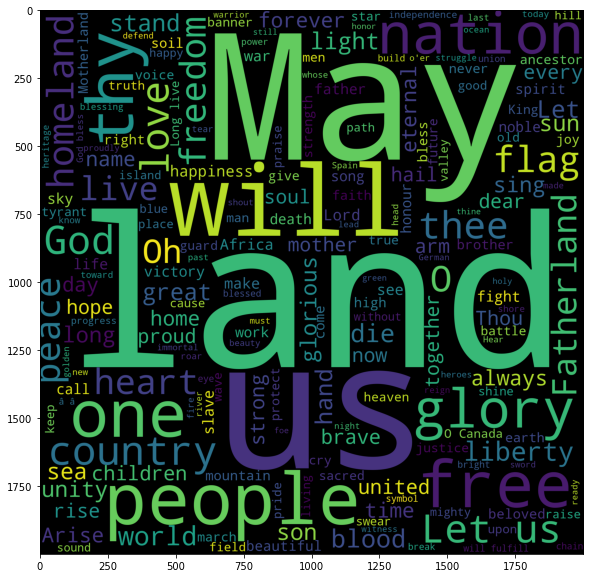

In [ ]:
spam_wc= wc.generate(df.Anthem.str.cat(sep=" "))
plt.figure(figsize=(30,10))
plt.imshow(spam_wc)

In [ ]:
cluster_df["Anthem"]=lirycs

In [ ]:
cluster_df

,Country,2d_cluster10,2d_cluster16,Anthem
0,Albania,1,4,around flag stand united with one wish one goa...
1,Armenia,9,6,our fatherland free independent that centuries...
2,Austria,3,12,land mountains land river land fields land cat...
3,Azerbaijan,2,7,azerbaijan azerbaijan the glorious fatherland ...
4,Belarus,9,15,we belarusians peaceful people wholeheartedly ...
...,...,...,...,...
185,Tunisia,1,14,o defenders homeland rally around glory time t...
186,Uganda,9,6,oh uganda may god uphold thee we lay future th...
187,Western Sahara,7,9,o sons sahara in battlefield torch holders lon...
188,Zambia,3,5,stand sing zambia proud free land work joy uni...


In [ ]:
def get_wc(cl_n):
  spam_wc= wc.generate(cluster_df[cluster_df["2d_cluster10"]==cl_n]["Anthem"].str.cat(sep=" "))
  plt.figure(figsize=(30,10))
  plt.imshow(spam_wc)
  print(cluster_df[cluster_df["2d_cluster10"]==cl_n]["Country"].values)


['Cyprus' 'Estonia' 'Georgia' 'Greece' 'Italy' 'Latvia' 'Liechtenstein'
 'Republic of North Macedonia' 'Slovakia' 'Slovenia' 'Puerto Rico'
 'Bermuda' 'New Zealand' 'Kiribati' 'Bahrain' 'Bhutan' 'Brunei' 'China'
 'India' 'Japan' 'Malaysia' 'Qatar' 'Thailand' 'Burkina Faso' 'Lesotho'
 'Madagascar' 'Morocco' 'Seychelles' 'South Africa' 'Tanzania']


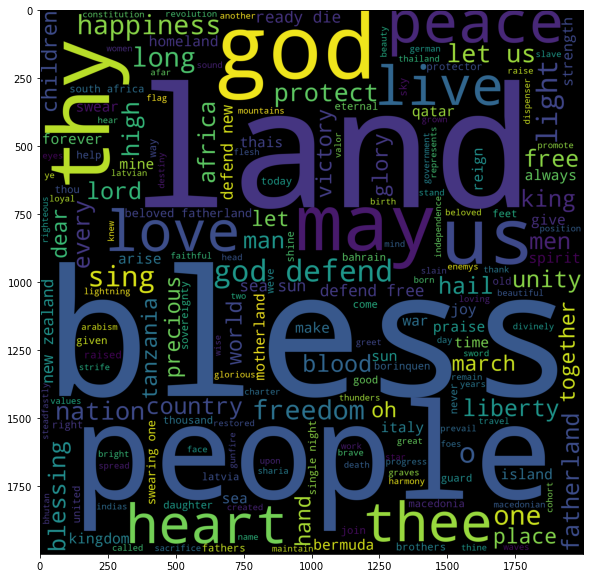

In [ ]:
get_wc(0)

['Albania' 'Croatia' 'Montenegro' 'Serbia' 'Suriname' 'Barbados'
 'Greenland' 'Cambodia' 'North Korea' 'Tajikistan' 'Vietnam' 'Gambia'
 'Guinea-Bissau' 'Ivory Coast' 'Liberia' 'Rwanda' 'Sierra Leone' 'Somalia'
 'Tunisia']


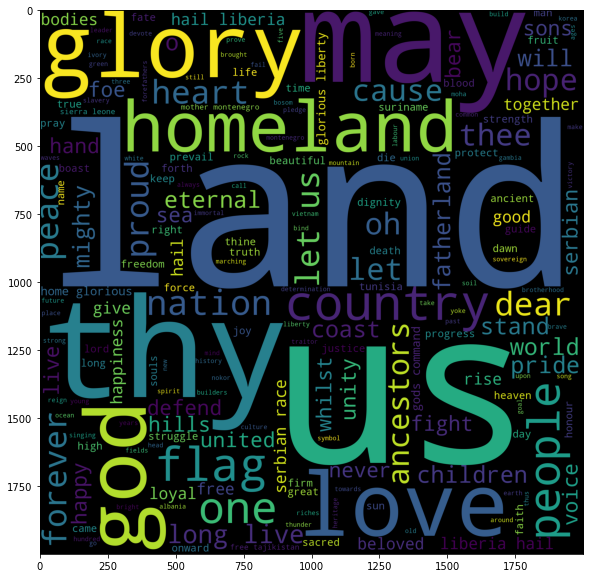

In [ ]:
get_wc(1)

['Azerbaijan' 'Denmark' 'France' 'Malta' 'Netherlands (the)' 'Bolivia'
 'Chile' 'Tonga' 'Jordan' 'Kazakhstan' 'Kuwait' 'Laos' 'Nepal'
 'Saudi Arabia' 'United Arab Emirates' 'Equatorial Guinea' 'Ethiopia'
 'Kenya' 'Namibia' 'Sudan']


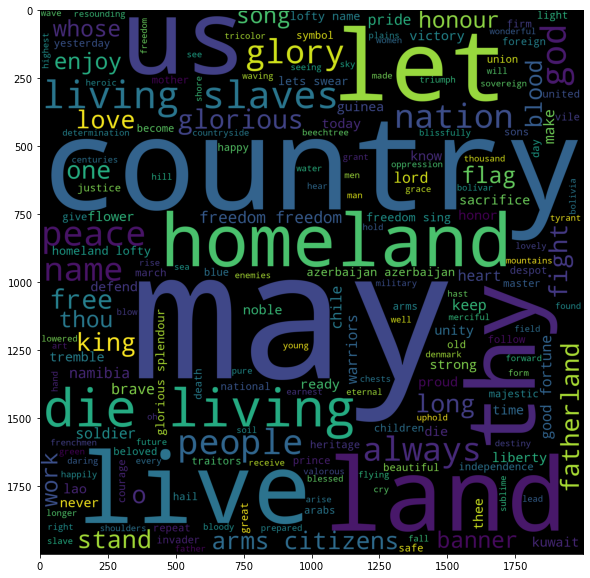

In [ ]:
get_wc(2)

['Austria' 'Bulgaria' 'Portugal' 'Guyana' 'Nicaragua' 'Panama'
 'Federated States of Micronesia' 'Kyrgyzstan' 'Algeria' 'Benin' 'Malawi'
 'Mauritius' 'Republic of the Congo' 'Zambia']


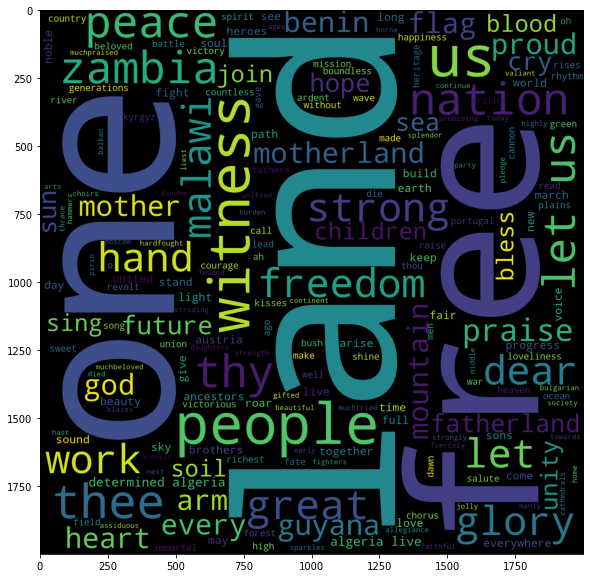

In [ ]:
get_wc(3)

['Finland' 'Luxembourg' 'Moldova (the Republic of)' 'Poland'
 'Russian Federation (the)' 'United States of America' 'Haiti'
 'Dominican Republic' 'Australia' 'Fiji' 'Palestine' 'Philippines'
 'South Korea' 'Yemen' 'Cameroon' 'Ghana' 'Mauritania' 'Niger'
 'Sao Tome and Principe']


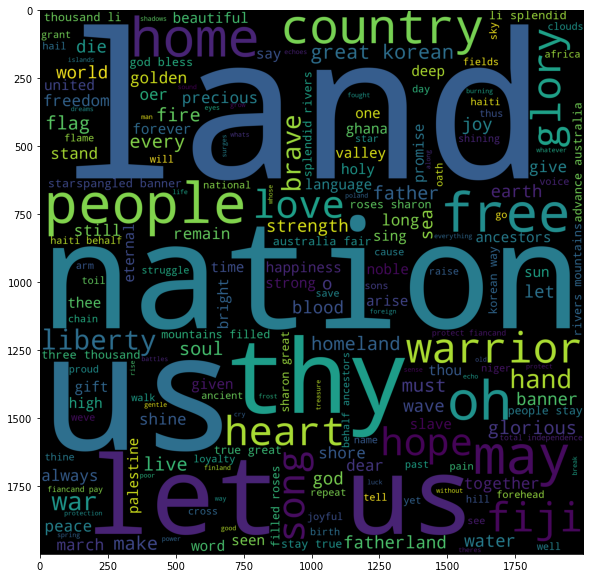

In [ ]:
get_wc(4)

['Belgium' 'Iceland' 'Spain' 'Sweden' 'Switzerland'
 'United Kingdom of Great Britain and Northern Ireland (the)' 'Brazil'
 'Canada' 'Guatemala' 'Honduras' 'El Salvador' 'Belize' 'Bangladesh'
 'Sri Lanka' 'Burundi' 'Nigeria' 'South Sudan']


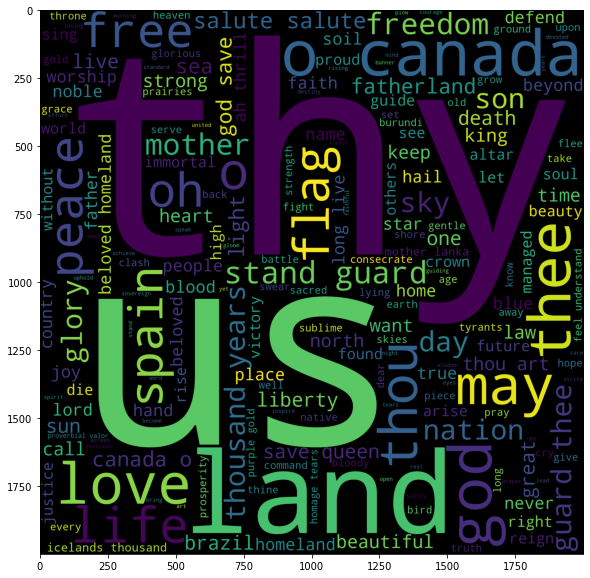

In [ ]:
get_wc(5)

In [ ]:
# for i in range(11):
#   get_wc(i)